In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

from IPython.display import display, Image, SVG, Math

In [2]:
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
asins = list(asins)


In [4]:

# load the original 16K dataset
data = pd.read_pickle('../code/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])

In [10]:
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    for i in range(len(indices)):
        rows = data[['medium_image_url', 'title']].loc[data['asin'] == asins[indices[i]]]
        
        for index, row in rows.iterrows():
            display(Image(url = row['medium_image_url'], embed = True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image: ', pdists[i])
            print('Amazon Url: www.amazon.com/dp/'+asins[indices[i]])

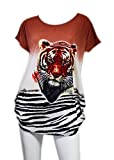

Product Title:  burnt umber tiger tshirt with zebra stripes xl  xxl 
Euclidean Distance from input image:  6.32596e-06
Amazon Url: www.amazon.com/dp/B00JXQB5FQ


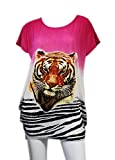

Product Title:  pink tiger tshirt with zebra stripes xl  xxl 
Euclidean Distance from input image:  30.05017
Amazon Url: www.amazon.com/dp/B00JXQASS6


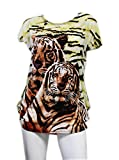

Product Title:  yellow tiger tshirt with tiger stripes m  l 
Euclidean Distance from input image:  41.261116
Amazon Url: www.amazon.com/dp/B00JXQCUIC


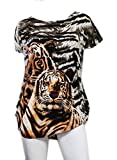

Product Title:  brown  white tiger tshirt with tiger stripes xl  xxl 
Euclidean Distance from input image:  44.000156
Amazon Url: www.amazon.com/dp/B00JXQCWTO


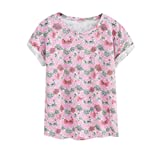

Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image:  47.38248
Amazon Url: www.amazon.com/dp/B071FCWD97


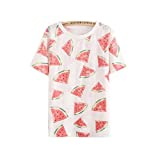

Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image:  47.71842
Amazon Url: www.amazon.com/dp/B01JUNHBRM


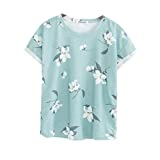

Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image:  47.90206
Amazon Url: www.amazon.com/dp/B071SBCY9W


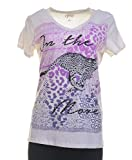

Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image:  48.046482
Amazon Url: www.amazon.com/dp/B01CUPYBM0


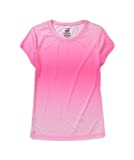

Product Title:  danskin now womens vneck loose performance tee xsmall pink ombre 
Euclidean Distance from input image:  48.101837
Amazon Url: www.amazon.com/dp/B01F7PHXY8


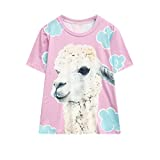

Product Title:  summer alpaca 3d pastel casual loose tops tee design 
Euclidean Distance from input image:  48.118866
Amazon Url: www.amazon.com/dp/B01I80A93G


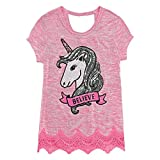

Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image:  48.13122
Amazon Url: www.amazon.com/dp/B0177DM70S


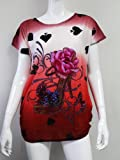

Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image:  48.16945
Amazon Url: www.amazon.com/dp/B00JV63QQE


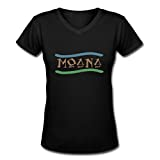

Product Title:  moana logo adults hot v neck t shirt black xxl 
Euclidean Distance from input image:  48.256786
Amazon Url: www.amazon.com/dp/B01LX6H43D


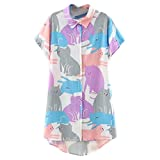

Product Title:  abaday multicolor cartoon cat print short sleeve longline shirt large 
Euclidean Distance from input image:  48.265686
Amazon Url: www.amazon.com/dp/B01CR57YY0


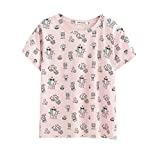

Product Title:  kawaii cotton pastel tops tees peach pink cactus design 
Euclidean Distance from input image:  48.362602
Amazon Url: www.amazon.com/dp/B071WYLBZS


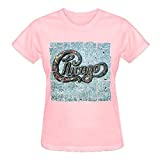

Product Title:  chicago chicago 18 t shirt women pink 
Euclidean Distance from input image:  48.383606
Amazon Url: www.amazon.com/dp/B01GXAZTRY


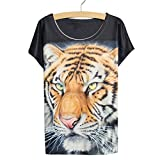

Product Title:  yichun womens tiger printed summer tshirts tops 
Euclidean Distance from input image:  48.449356
Amazon Url: www.amazon.com/dp/B010NN9RXO


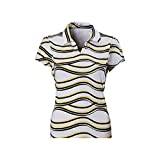

Product Title:  nancy lopez whimsy short sleeve  whiteblacklemon drop  xs 
Euclidean Distance from input image:  48.47889
Amazon Url: www.amazon.com/dp/B01MPX6IDX


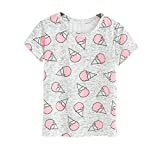

Product Title:  womens tops tees pastel peach ice cream cone print 
Euclidean Distance from input image:  48.557957
Amazon Url: www.amazon.com/dp/B0734GRKZL


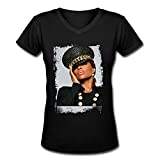

Product Title:  uswomens mary j blige be without you tshirts shirt 
Euclidean Distance from input image:  48.614372
Amazon Url: www.amazon.com/dp/B01M0XXFKK


In [11]:
get_similar_products_cnn(12920, 20)
